In [ ]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Wczytanie danych
serce = pd.read_csv('serce.csv')

X = serce.drop('diagnoza', axis=1)
y = serce['diagnoza']
class_names = ["1", "2"]
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utworzenie i trenowanie modelu klasyfikacji
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Utworzenie obiektu explainera SHAP
explainer = shap.TreeExplainer(model)

# Obliczenie wartości SHAP dla zbioru testowego
shap_values = explainer.shap_values(X_test)

shap.initjs()
# Generowanie force_plot dla wszystkich klas wybranej obserwacji
shap.force_plot(
    explainer.expected_value[0], 
    shap_values[0][1], 
    X_test.iloc[1,:-1],
    feature_names=X_test.columns[:-1],
    show=True,
    matplotlib=True,
)

In [109]:
#tworzy wyjaśniacz do obliczania wartości SHAP dla wszystkich próbek
explainer = shap.explainers.Exact(model.predict_proba, X)
shap_values = explainer(X)

ExactExplainer explainer: 271it [13:02,  2.93s/it]                         


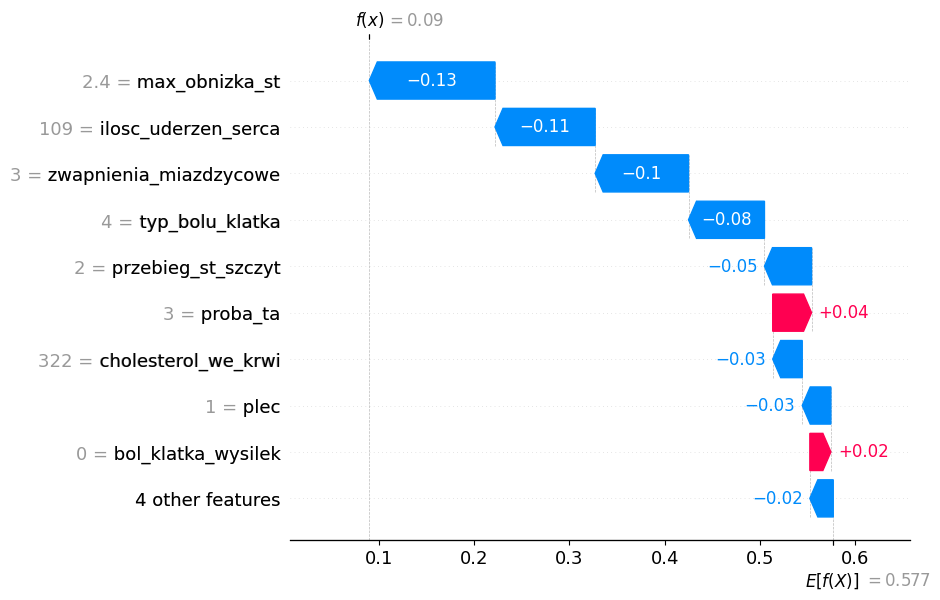

In [110]:
#wybieranie pierwszej kolumny wartości SHAP
shap_values = shap_values[..., 0]
#generuje wykres wodospadowy dla piewszej próbki
shap.plots.waterfall(shap_values[0])


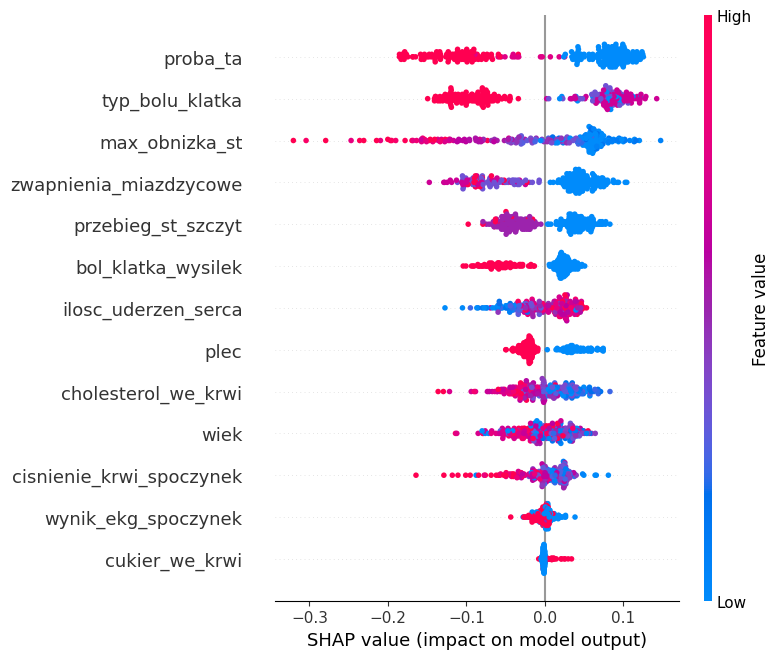

In [111]:
#eneruje podsumowujący wykres wartości SHAP 
shap.summary_plot(shap_values)

In [112]:
# generuje wyjaśniacz SHAP dla modelu w tym przypadku automatycznie wykrywa typ modelu
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

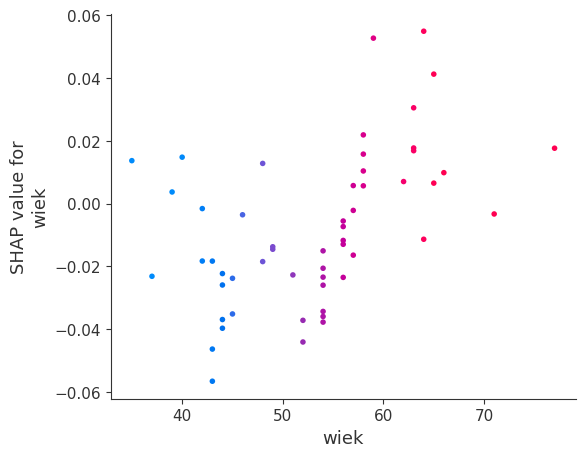

In [114]:
#generuje wykres zależności wartości SHAP dla cechy wiek
shap.dependence_plot("wiek", shap_values[:, :, 1], X_test,interaction_index="wiek")

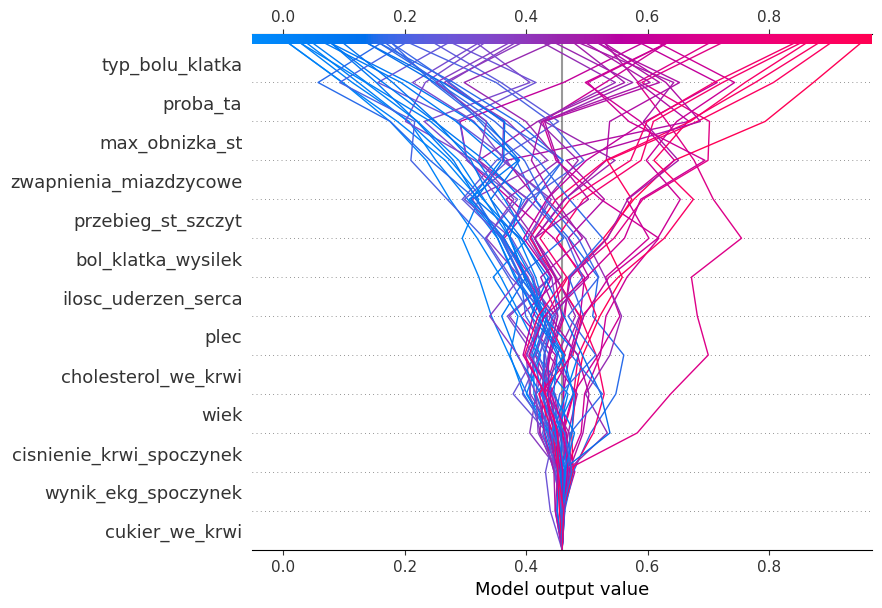

In [115]:
#generuje wykres decyzyjny SHAP dla drugiej klasy w modelu
shap.decision_plot(explainer.expected_value[1], shap_values[:, :, 1], X_test.columns)